In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
# assign figure size
matplotlib.rcParams["figure.figsize"]=(20,10)

In [40]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [41]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [42]:
df.shape

(13320, 9)

In [43]:
df.groupby(['area_type'])['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [44]:
df2=df.drop(['area_type','balcony','society','availability'],axis=1)

In [45]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [46]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [47]:
df3=df2.dropna()
df3.isnull().sum()
df3.shape

(13246, 5)

In [48]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [49]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split()[0]))

C:\Users\Azim\AppData\Local\Temp\ipykernel_10252\3423034364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x:int(x.split()[0]))


In [50]:
df3.head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [52]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [53]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [54]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [55]:
df3[~df3['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [56]:
def convert_range_to_num(x):
    lis=x.split('-')
    if(len(lis)==2):
        return ((float(lis[0])+float(lis[1]))/2)
    try:
        return float(x)
    except:
        return None

In [57]:
df4=df3.copy()

In [58]:
df4['total_sqft']=df4['total_sqft'].apply(convert_range_to_num)

In [59]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [60]:
# we know that price per sq ft is very important
df5=df4.copy()
df5['price_per_sqft']=(df5['price']*10**5)/df5['total_sqft']

In [61]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [62]:
df5['location']=df5['location'].apply(lambda x:x.strip())
stat=df5.groupby('location')['location'].agg('count')
stat.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [63]:
# stat.values.sum()
len(stat[stat<=10])
stat_lessthan10=stat[stat<=10]


In [64]:
df5['location']=df5['location'].apply(lambda x:'other' if x in stat_lessthan10 else x)

In [65]:
len(df5['location'].unique())


242

In [66]:
df5[df5.total_sqft/df5.bhk<300].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [67]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]

In [68]:
df6.shape

(12502, 7)

In [69]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [70]:
def rem_ppc_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        std=np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out=pd.concat([reduced_df,df_out],ignore_index=True)
    return df_out

df7=rem_ppc_outlier(df6)

In [71]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.0,3,10469.314079
1,other,2 BHK,1100.0,2.0,48.0,2,4363.636364
2,other,3 BHK,1250.0,3.0,56.0,3,4480.000000
3,other,1 BHK,600.0,1.0,38.0,1,6333.333333
4,other,2 BHK,869.0,2.0,36.0,2,4142.692750


In [72]:
def plot_scatter(df,location):
    bhk2=df7[(df7['location']==location)&(df7['bhk']==2)]
    bhk3=df7[(df7['location']==location)&(df7['bhk']==3)]
    matplotlib.rcParams['figure.figsize']=(15,15)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='red',label='2bhk',s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],color='blue',marker='*',label='3bhk',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

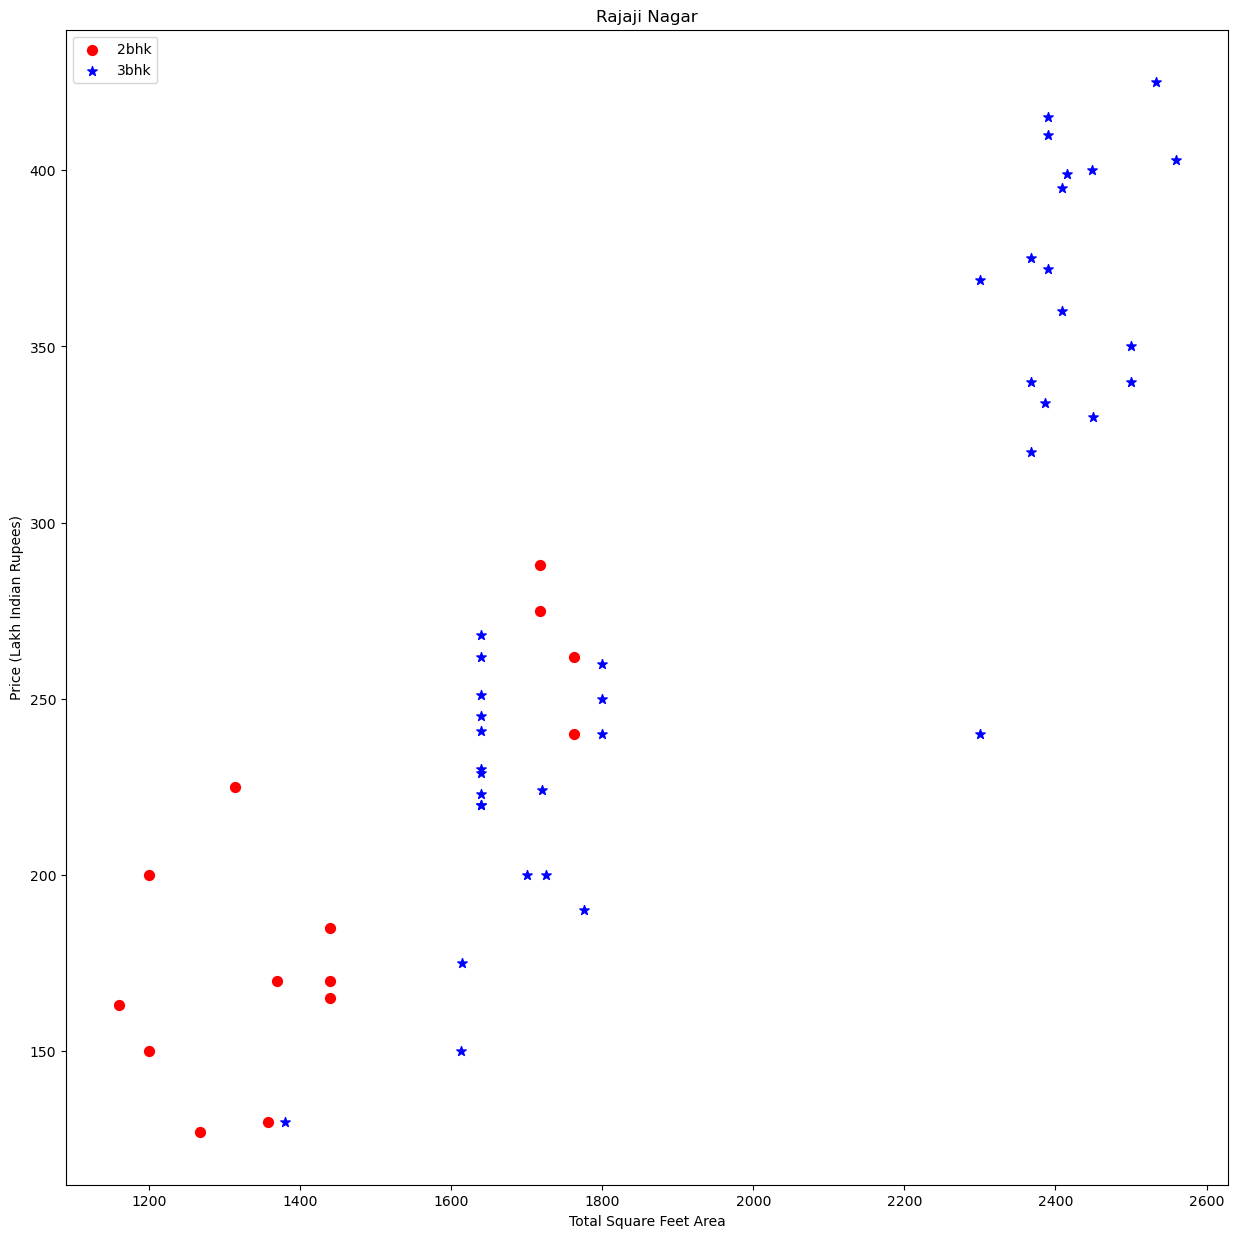

In [73]:
plot_scatter(df7,"Rajaji Nagar")

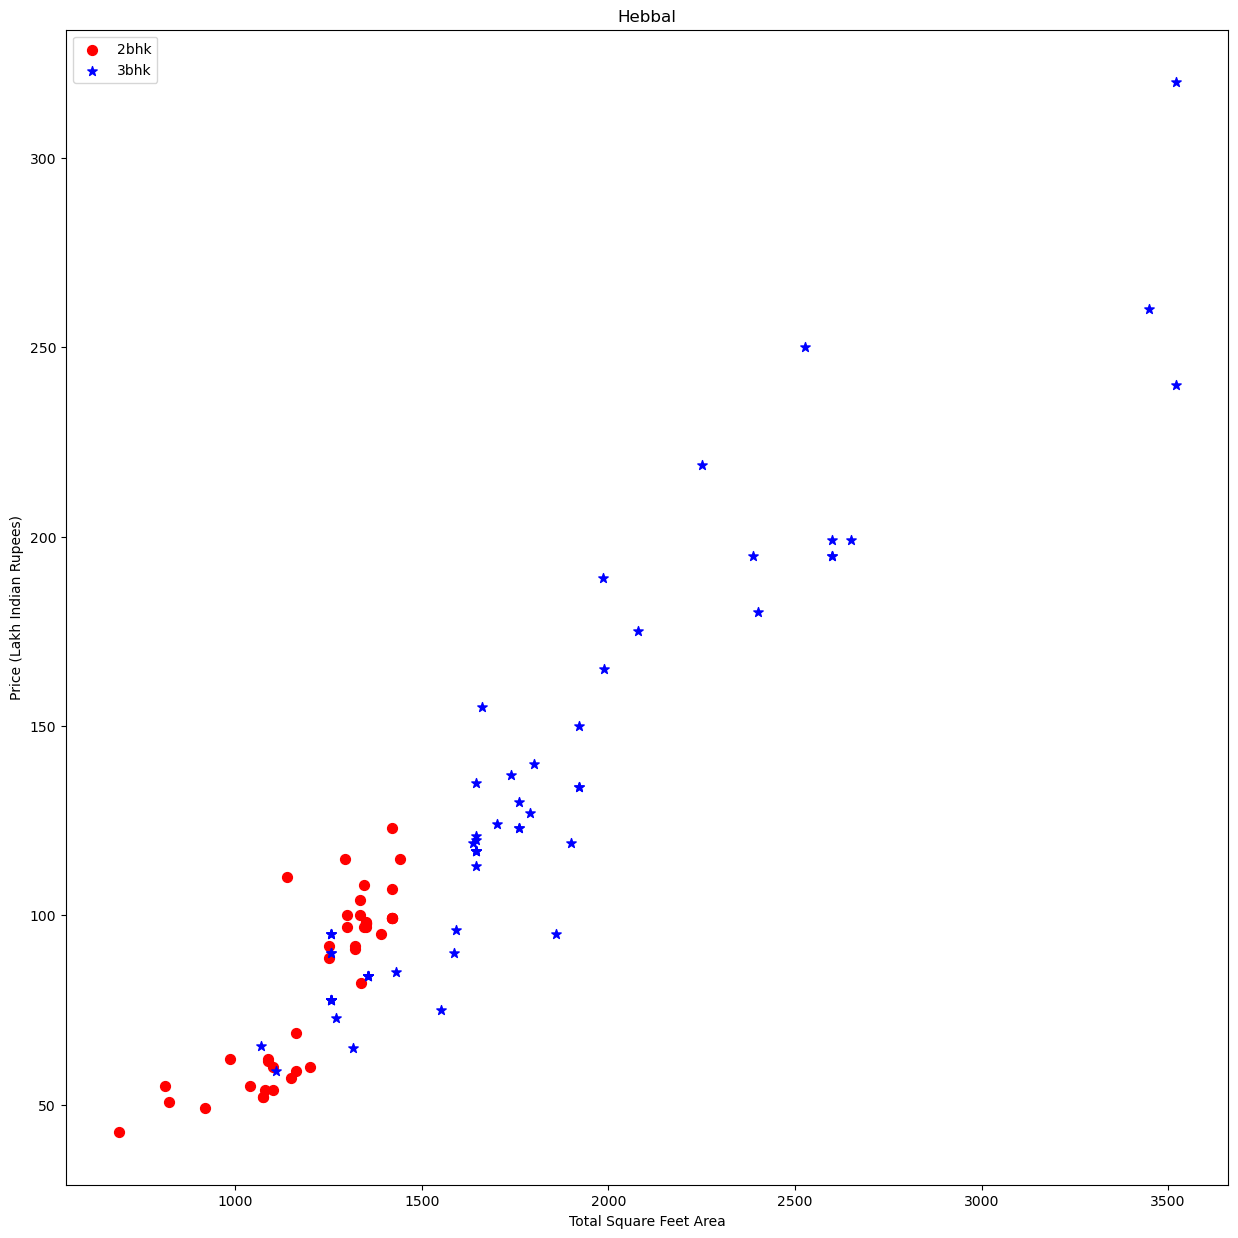

In [74]:
plot_scatter(df7,"Hebbal")

In [75]:
def rem_bhk_outlier(df):
    ind=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]}
            for bhk,bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                     ind = np.append(ind, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(ind,axis='index')

               

In [76]:
df8 = rem_bhk_outlier(df7)


In [77]:
df8.shape

(7329, 7)

In [78]:
len(df8[df8['location']!='other']['location'].unique())


241

Text(0, 0.5, 'Count')

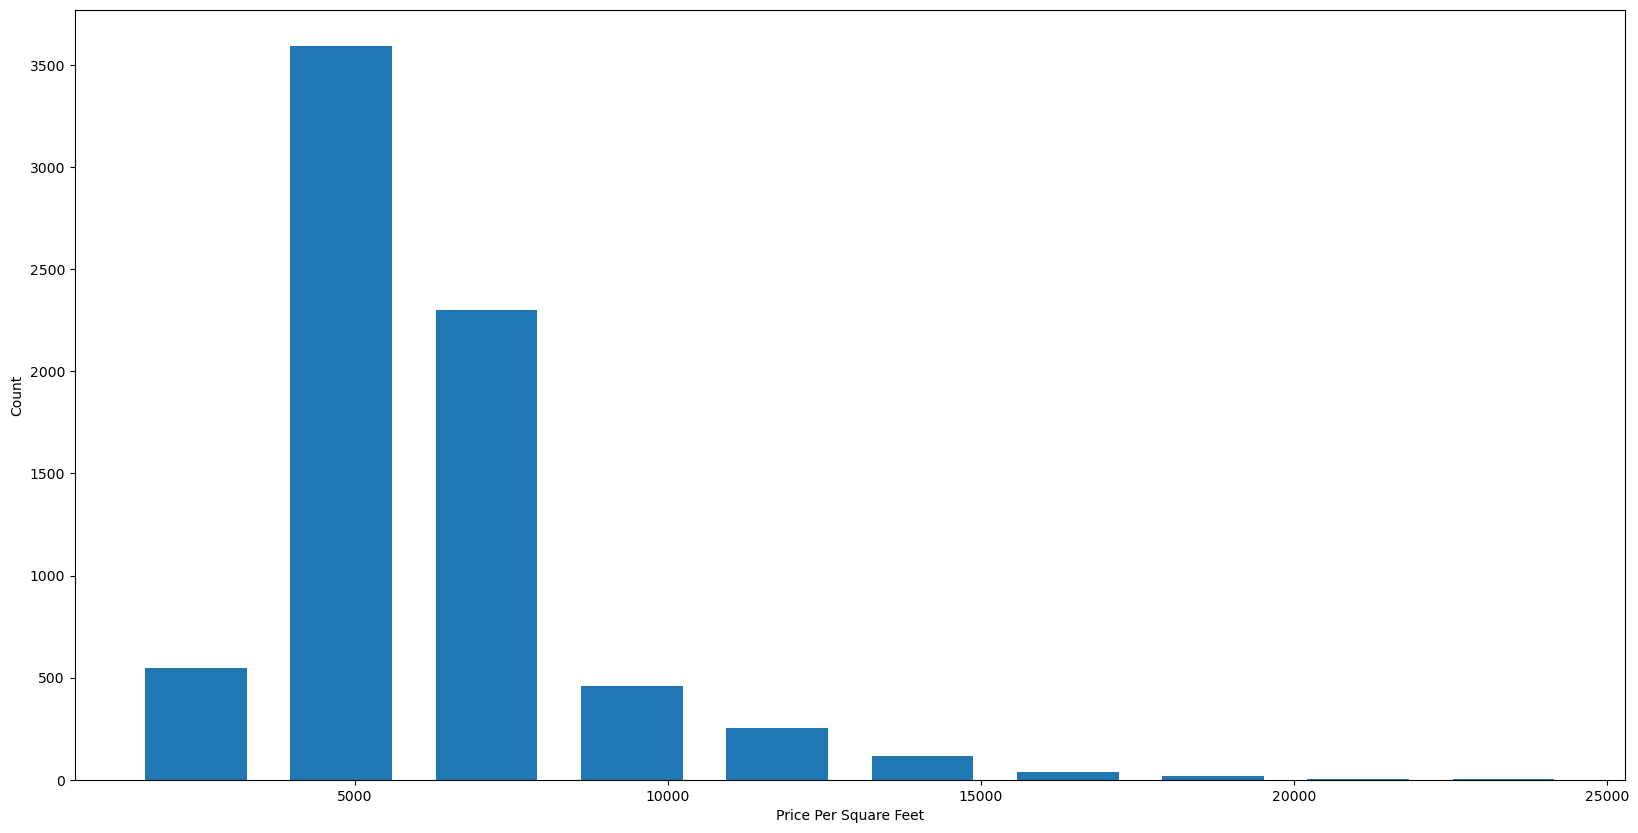

In [79]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8['price_per_sqft'],rwidth=0.7)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [80]:
df8['bath'].unique()

array([ 4.,  1.,  2.,  3.,  8.,  9.,  5.,  6., 12., 16.,  7., 13.])

In [81]:
df8[df8['bath']>10].head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
546,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
635,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
1368,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
1699,other,13 BHK,5425.0,13.0,275.0,13,5069.124424
4968,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000


In [82]:
df9 = df8[~(df8.bath>=df8.bhk+2)]
df9.shape

(7251, 7)

In [83]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.0,3,10469.314079
3,other,1 BHK,600.0,1.0,38.0,1,6333.333333


In [84]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(100)

,location,total_sqft,bath,price,bhk
0,other,2770.0,4.0,290.0,3
3,other,600.0,1.0,38.0,1
6,other,1500.0,2.0,185.0,2
7,other,840.0,2.0,45.0,2
8,other,4395.0,3.0,240.0,3
...,...,...,...,...,...
180,other,530.0,1.0,20.0,1
181,other,1350.0,2.0,80.0,2
183,other,2400.0,6.0,125.0,8
185,other,1141.0,2.0,62.0,2


In [85]:
dummies=pd.get_dummies(df10['location'])


In [86]:
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

In [88]:
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,other,2770.0,4.0,290.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,other,600.0,1.0,38.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,other,1500.0,2.0,185.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,other,840.0,2.0,45.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,other,4395.0,3.0,240.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df12 = df11.drop('location',axis='columns')
df12.tail(20)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10219,2059.0,3.0,225.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10220,1394.0,2.0,100.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10221,1077.0,2.0,93.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10222,1566.0,2.0,180.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10223,840.0,2.0,50.0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10224,1590.0,3.0,131.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10225,2180.0,3.0,210.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10226,1180.0,2.0,88.5,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10227,1200.0,2.0,86.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10228,1394.0,2.0,85.0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
df12.shape

(7251, 245)

In [91]:
X=df12.drop('price',axis='columns')

In [92]:
Y=df12['price']

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.856709245432432

In [95]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=10)
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.85670925, 0.84273373, 0.83304616, 0.84858147, 0.87501098,
       0.87775319, 0.8116962 , 0.87345631, 0.80711689, 0.83116771])

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [100]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

C:\Users\Azim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Azim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Azim\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Azim\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Azim\anaconda3\lib\site-packages\sklearn\base.py", line 581, 

,model,best_score,best_params
0,lasso,0.710622,"{'alpha': 1, 'selection': 'random'}"
1,decision_tree,0.732501,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [102]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [107]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [ ]:
model.predict()

In [113]:
def model_predictor(location,sqft,bath,bhk):
    location_ind=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if(location_ind>=0):
        x[location_ind]=1
    return model.predict([x])[0]

In [120]:
model_predictor('1st Phase JP Nagar',1394, 2, 2)

C:\Users\Azim\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


112.64408313795084

In [121]:
import pickle
with open('home_prices_blr_model.pickle','wb') as f:
    pickle.dump(model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))